Created new models with state modulation (so, pass pupil through sdexp before modulation latent noise variables)

Check out how the fit works here by comparing raw state sinals to modulated state signals

In [15]:
from nems.xform_helper import load_model_xform
import nems.db as nd

import matplotlib.pyplot as plt
import numpy as np

In [85]:
modelname = 'psth.fs4.pup-ld-st.pup+r1+s0-epcpn-hrc-psthfr.z-plgsm.er5-aev_stategain.SxR-spred-stmod.S.0,1-lvnorm.2xR.so.sm-inoise.SxR.sm_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.t5.f0.ss1'
modelname0 = 'psth.fs4.pup-ld-st.pup0.pvp-epcpn-hrc-psthfr.z-plgsm.er5-aev_stategain.SxR-spred-lvnorm.2xR.so-inoise.SxR_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.t5.f0.ss1'
batch = 331
site = 'AMT020a'
cellid = [c for c in nd.get_batch_cells(batch).cellid if site in c][0]

In [86]:
xf, ctx = load_model_xform(cellid=cellid, modelname=modelname, batch=batch, only=slice(0,16), eval_model=False)
extra_epochs = [':'.join([e[0], str(e[1])]) for e in ctx["val"].meta['mask_bins']]
err = cc_comp(ctx["val"], extra_epochs)
xf0, ctx0 = load_model_xform(cellid=cellid, modelname=modelname0, batch=batch, only=slice(0,16), eval_model=False)
extra_epochs = [':'.join([e[0], str(e[1])]) for e in ctx0["val"].meta['mask_bins']]
err0 = cc_comp(ctx0["val"], extra_epochs)

[nems.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/331/AMT020a/psth.fs4.pup-ld-st.pup+r1+s0-epcpn-hrc-psthfr.z-plgsm.er5-aev.stategain.SxR-spre...6144501677987004148 ...
[nems.xforms INFO] Evaluating: nems.xforms.init_context
[nems.xforms INFO] Evaluating: nems.xforms.init_context
[nems.xforms INFO] xf argument cellid overlaps with existing context key: nems.xforms.init_context
[nems.xforms INFO] Evaluating: nems.xforms.load_recordings
[nems.utils INFO] Adjusting URI from http://hyrax.ohsu.edu:3003/recordings/331/AMT020a_eb4a1abbdccff095212f099664ec974b7cff14a4.tgz to /auto/data/nems_db/recordings/331/AMT020a_eb4a1abbdccff095212f099664ec974b7cff14a4.tgz
[nems.xforms INFO] Extracting cellid(s) ['AMT020a-02-1', 'AMT020a-04-1', 'AMT020a-07-1', 'AMT020a-08-1', 'AMT020a-09-1', 'AMT020a-11-1', 'AMT020a-12-1', 'AMT020a-13-1', 'AMT020a-16-1', 'AMT020a-16-2', 'AMT020a-17-1', 'AMT020a-17-2', 'AMT020a-22-2', 'AMT020a-22-3', 'AMT020a-24-5', 'AMT020a-24-6', 'AMT020a-25-2'

masked ['STIM_probe:05_cat173_rec1_giggling_excerpt1_5:1', 'STIM_probe:05_cat173_rec1_giggling_excerpt1_5:0', 'STIM_probe:05_cat173_rec1_giggling_excerpt1_5:2', 'STIM_probe:15_cat668_rec1_ferret_fights_Athena-Violet001_excerpt2_15:0', 'STIM_probe:15_cat668_rec1_ferret_fights_Athena-Violet001_excerpt2_15:1'] len from 9600 to 4000


[nems.xforms INFO] Evaluating: nems.xforms.init_context
[nems.xforms INFO] Evaluating: nems.xforms.init_context
[nems.xforms INFO] xf argument cellid overlaps with existing context key: nems.xforms.init_context
[nems.xforms INFO] Evaluating: nems.xforms.load_recordings
[nems.utils INFO] Adjusting URI from http://hyrax.ohsu.edu:3003/recordings/331/AMT020a_eb4a1abbdccff095212f099664ec974b7cff14a4.tgz to /auto/data/nems_db/recordings/331/AMT020a_eb4a1abbdccff095212f099664ec974b7cff14a4.tgz
[nems.xforms INFO] Extracting cellid(s) ['AMT020a-02-1', 'AMT020a-04-1', 'AMT020a-07-1', 'AMT020a-08-1', 'AMT020a-09-1', 'AMT020a-11-1', 'AMT020a-12-1', 'AMT020a-13-1', 'AMT020a-16-1', 'AMT020a-16-2', 'AMT020a-17-1', 'AMT020a-17-2', 'AMT020a-22-2', 'AMT020a-22-3', 'AMT020a-24-5', 'AMT020a-24-6', 'AMT020a-25-2', 'AMT020a-25-3', 'AMT020a-26-1', 'AMT020a-26-2', 'AMT020a-27-3', 'AMT020a-28-3', 'AMT020a-28-4', 'AMT020a-29-1', 'AMT020a-29-2', 'AMT020a-29-3', 'AMT020a-30-6', 'AMT020a-31-1', 'AMT020a-31-2', 'AM

masked ['STIM_probe:05_cat173_rec1_giggling_excerpt1_5:1', 'STIM_probe:05_cat173_rec1_giggling_excerpt1_5:0', 'STIM_probe:05_cat173_rec1_giggling_excerpt1_5:2', 'STIM_probe:15_cat668_rec1_ferret_fights_Athena-Violet001_excerpt2_15:0', 'STIM_probe:15_cat668_rec1_ferret_fights_Athena-Violet001_excerpt2_15:1'] len from 9600 to 4000


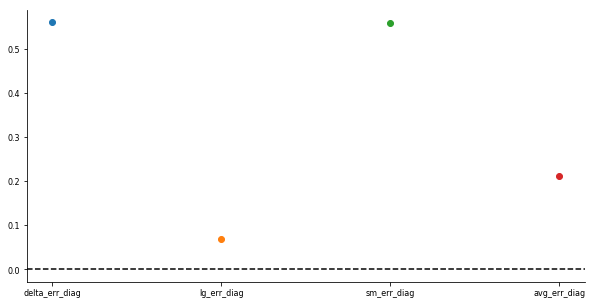

In [88]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
xticks = []
ii = 0
for i, k in enumerate(err.keys()):
    if "_diag" in k:
        xticks.append(k)
        ax.plot(ii, err[k] - err0[k], 'o')
        ii += 1
ax.set_xticks(range(0, len(xticks)))
ax.set_xticklabels(xticks)
ax.axhline(0, linestyle='--', color='k')

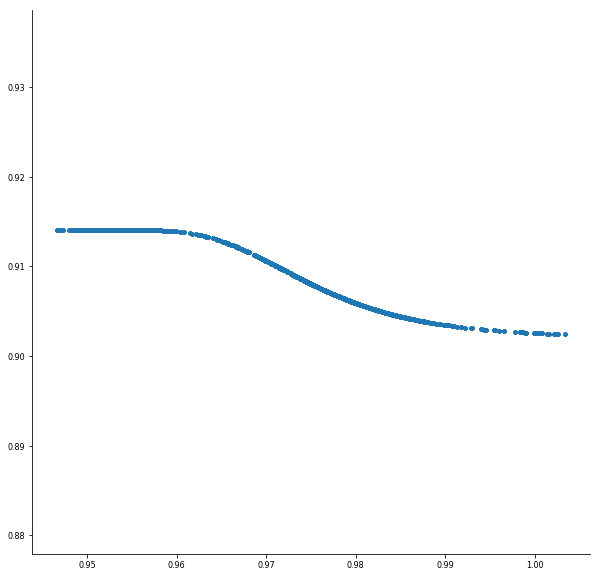

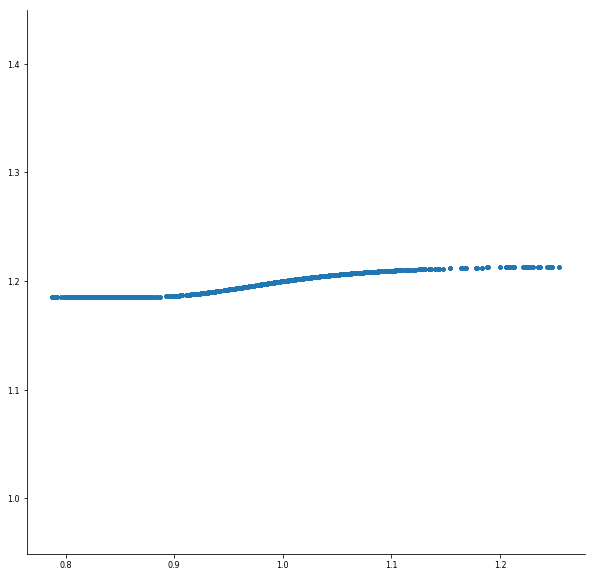

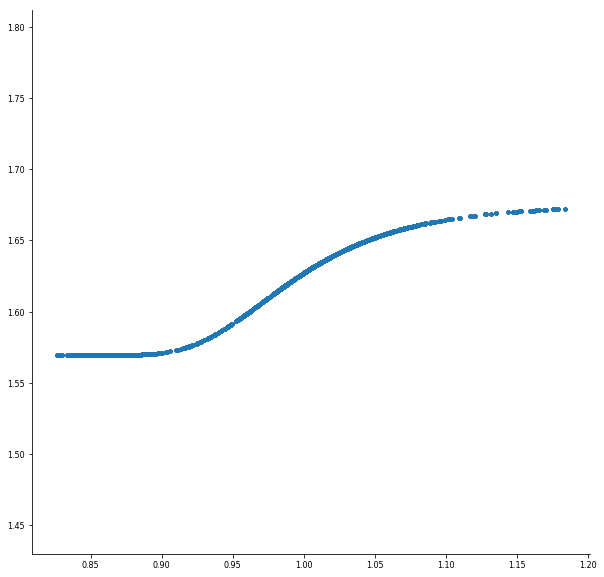

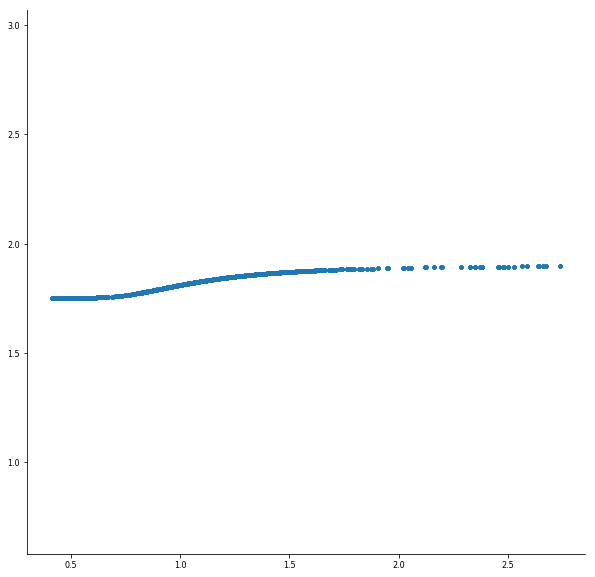

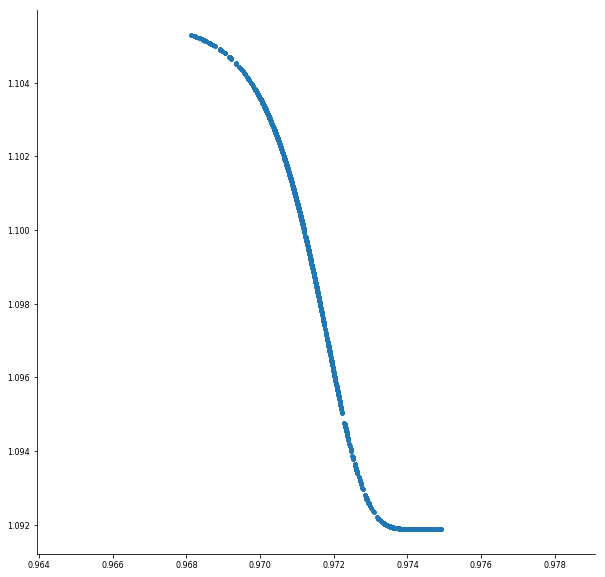

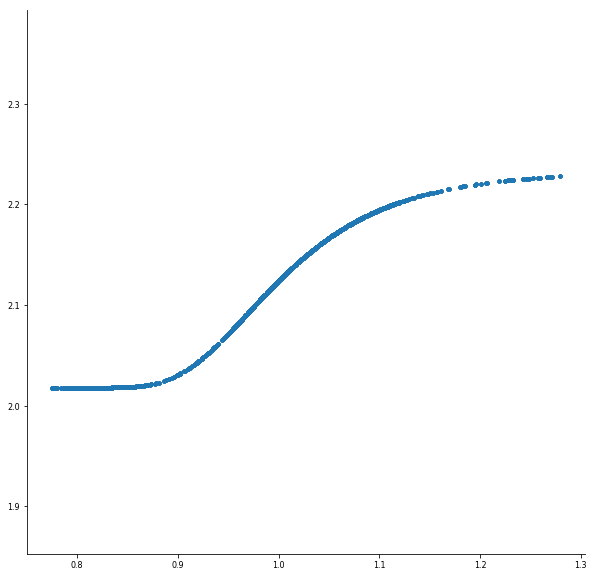

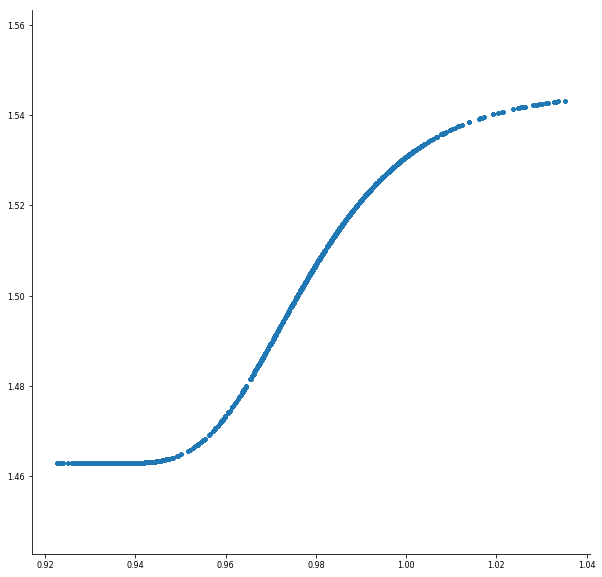

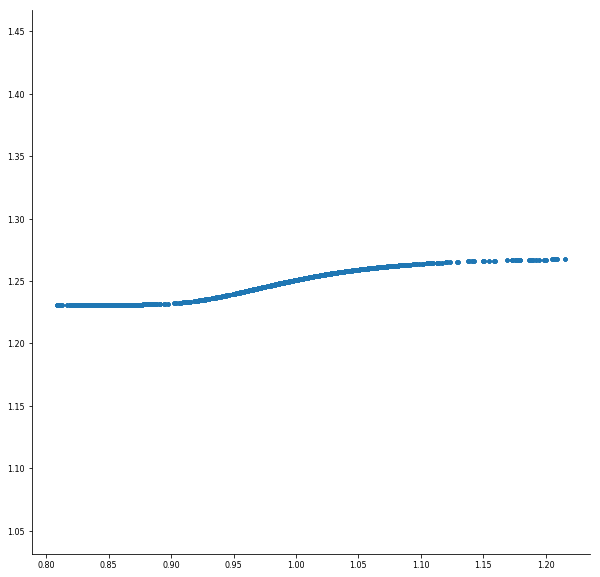

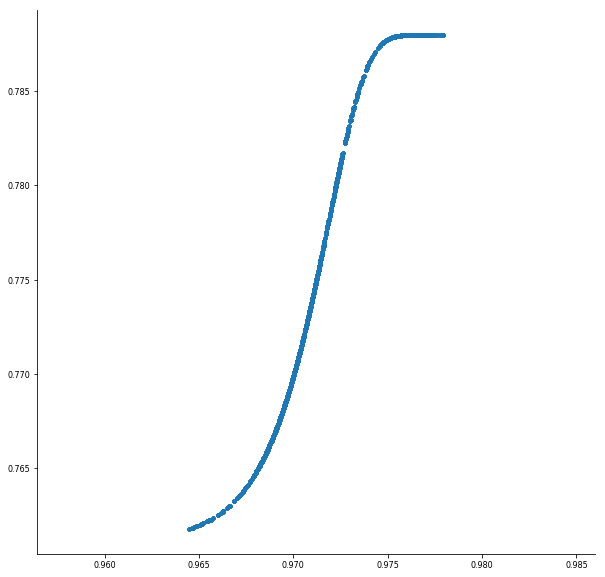

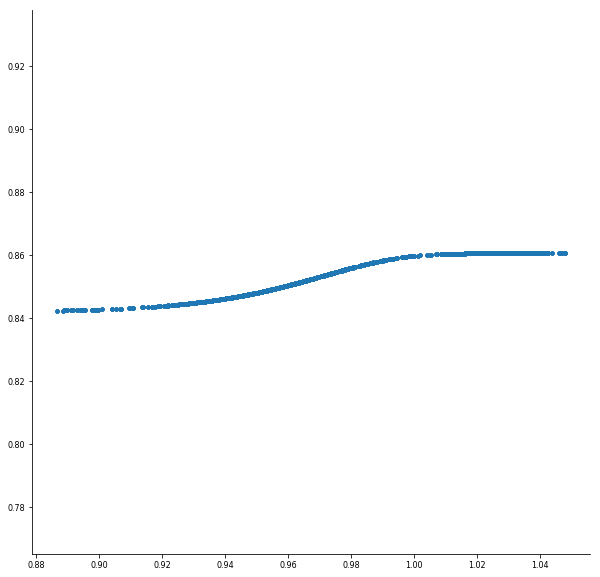

In [59]:
rec = ctx['val'].copy().apply_mask()
for cid in range(0, 10):
    f, ax = plt.subplots(1, 1, figsize=(10, 10))
    g = ctx['modelspec'].phi[3]['g'][cid, 0]
    d = ctx['modelspec'].phi[3]['d'][0, 0]

    g0 = ctx0['modelspec'].phi[2]['g'][cid, 0]
    d0 = ctx0['modelspec'].phi[2]['d'][0, 0]
    ax.plot(np.exp(rec['state']._data[1,:] * g0 + d0), np.exp(rec['state_mod']._data[1, :] * g + d), '.')
    ax.axis('equal')

In [22]:
np.mean(rec['state_mod'][1, :])

0.4323178724409946

In [36]:
ctx['modelspec'].phi[3]['d'].shape

(1, 2)

In [60]:
def cc_comp(r, extra_epoch):
    rec = r.apply_mask()
    if type(extra_epoch) is list:
        for i, e in enumerate(extra_epoch):
            if i == 0:
                large_idx=rec['mask_'+e+'_lg'].as_continuous()[0,:].astype(bool)
                small_idx=rec['mask_'+e+'_sm'].as_continuous()[0,:].astype(bool)
            else:
                li = rec['mask_'+e+'_lg'].as_continuous()[0,:].astype(bool)
                si = rec['mask_'+e+'_sm'].as_continuous()[0,:].astype(bool)
                large_idx += li
                small_idx += si
    else:
        large_idx=rec['mask_'+extra_epoch+'_lg'].as_continuous()[0,:].astype(bool)
        small_idx=rec['mask_'+extra_epoch+'_sm'].as_continuous()[0,:].astype(bool)
    print(f"masked {extra_epoch} len from {rec['mask'].as_continuous().sum()} to {large_idx.sum()+small_idx.sum()}")

    input_name = 'pred0'

    pred0 = rec[input_name].as_continuous()
    pred = rec['pred'].as_continuous()
    resp = rec['resp'].as_continuous()
    state = rec['state'].as_continuous()

    large_cc = np.cov(resp[:,large_idx]-pred0[:,large_idx])
    small_cc = np.cov(resp[:,small_idx]-pred0[:,small_idx])
    sm_cc = np.cov(pred[:,small_idx]-pred0[:,small_idx])
    lg_cc = np.cov(pred[:,large_idx]-pred0[:,large_idx])
    all_cc = np.cov(resp[:,large_idx|small_idx]-pred0[:,large_idx|small_idx])
    allp_cc = np.cov(pred[:,large_idx|small_idx]-pred0[:,large_idx|small_idx])

    delta_err_up = np.mean((np.triu(large_cc-small_cc, 1) - np.triu(lg_cc-sm_cc, 1))**2)
    delta_err_diag = np.mean((np.diag(large_cc-small_cc) - np.diag(lg_cc-sm_cc))**2)

    lg_err_up = np.mean((np.triu(large_cc, 1) - np.triu(lg_cc, 1))**2)
    lg_err_diag = np.mean((np.diag(large_cc) - np.diag(lg_cc))**2)

    sm_err_up = np.mean((np.triu(small_cc, 1) - np.triu(sm_cc, 1))**2)
    sm_err_diag = np.mean((np.diag(small_cc) - np.diag(sm_cc))**2)

    avg_err_up = np.mean((np.triu(all_cc, 1) - np.triu(allp_cc, 1))**2)
    avg_err_diag = np.mean((np.diag(all_cc) - np.diag(allp_cc))**2)

    err = {
        "delta_err_up": delta_err_up,
        "delta_err_diag": delta_err_diag,
        "lg_err_up": lg_err_up,
        "lg_err_diag": lg_err_diag,
        "sm_err_up": sm_err_up,
        "sm_err_diag": sm_err_diag,
        "avg_err_up": avg_err_up,
        "avg_err_diag": avg_err_diag
    }

    return err